In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
from IPython.core.display import Image, display

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams['font.size'] = 12



# Principal Component Analysis


# Introduction

[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) is an unsupervised learning method highly efficient for dimensionality reduction in a dataset. PCA performs a lineaer dimensionality reduction. 

### Example in two dimensions

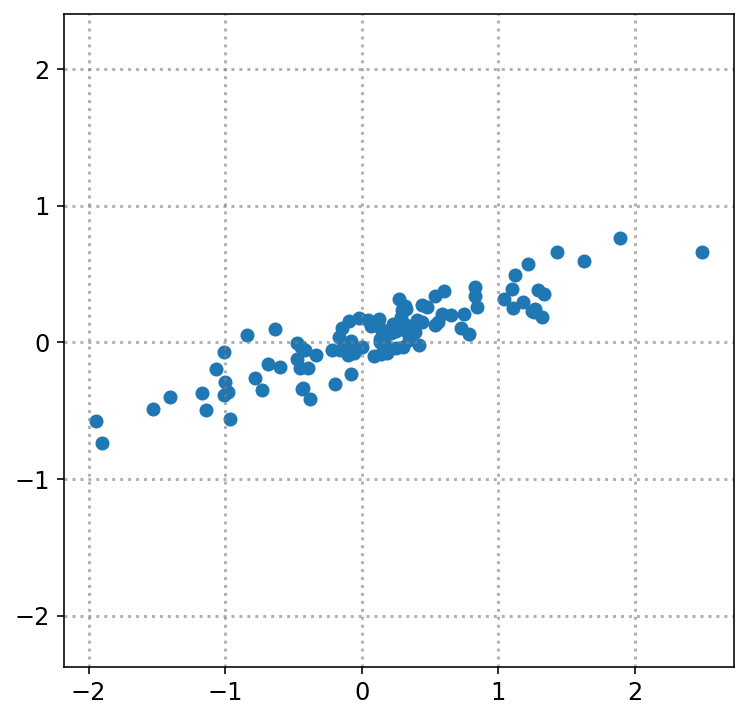

The reconstruction error is 0.16
The variance of the projected data in vector u is 0.56


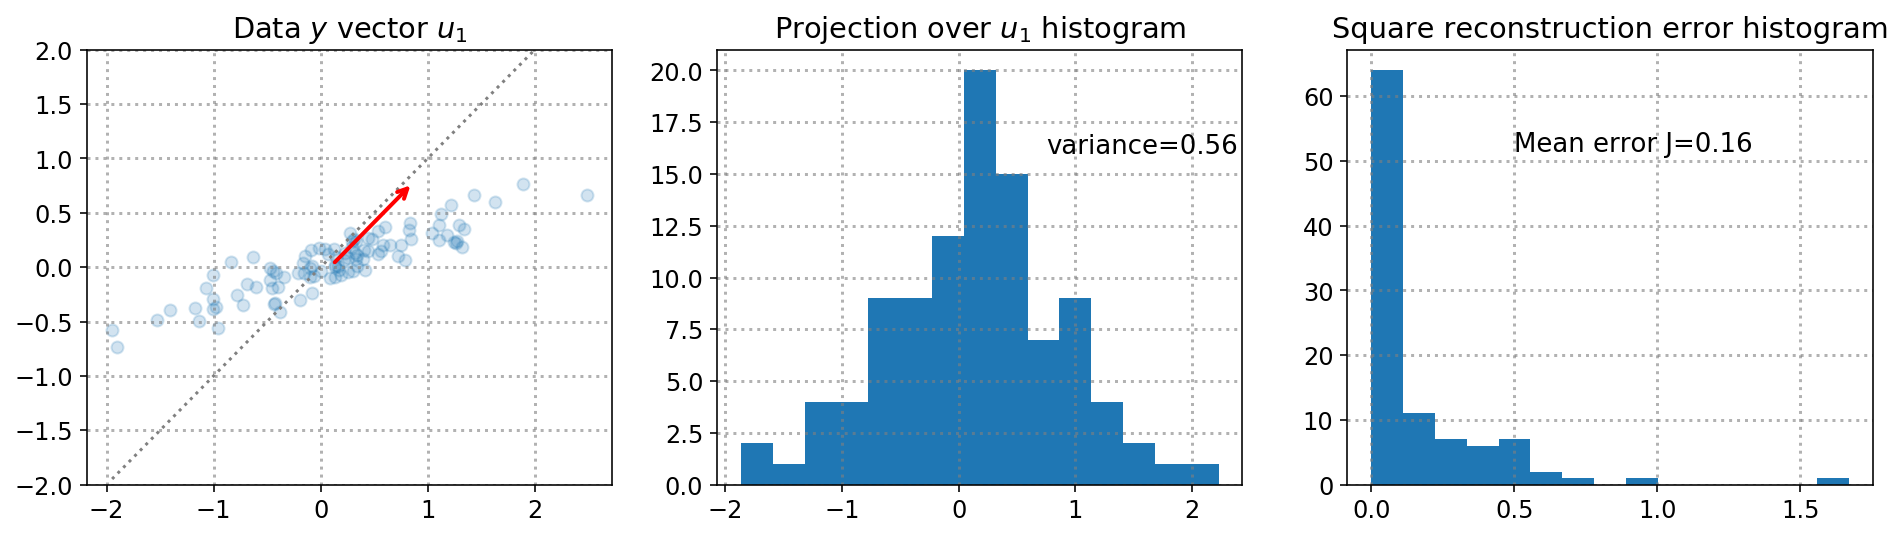

In [4]:
# Generate data
rng = np.random.RandomState(1)
A = rng.rand(2, 2)
X = (A@rng.randn(2, 100)).T

plt.scatter(X[:, 0], X[:, 1])
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.axis('equal')
plt.show()

a = np.pi/4
u = np.array([np.cos(a),np.sin(a)]).reshape([-1,1]) # Cartesian coords


Z = X @ u # Proyections upon u of data X
X_r = Z @ u.T

J = np.mean(np.linalg.norm(X-X_r,axis=1)**2)

variance = np.var(Z)

print("The reconstruction error is {0:.2f}".format(J))
print("The variance of the projected data in vector u is {0:.2f}".format(variance))

nbins = 15

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

    
fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax_l.set_ylim([-1,1])
ax_l.scatter(X[:, 0], X[:, 1], alpha=0.2)
ax_l.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
xgrid=np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
ax_l.plot(xgrid, xgrid*u[1]/u[0], ':', color='gray')
draw_vector(np.mean(X,axis=0).reshape(2,1), np.mean(X,axis=0).reshape(2,1) + u,ax_l)
ax_l.set_ylim(-2,2)
ax_l.set_title(r"Data $y$ vector $u_1$")

ax_c.hist(Z,nbins)
ax_c.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_c.set_title(r"Projection over $u_1$ histogram")
ax_c.text(0.75, 16, 'variance={0:.2f}'.format(variance), fontsize=13)


ax_r.hist(np.linalg.norm(X-X_r,axis=1)**2,nbins)
ax_r.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_r.set_title("Square reconstruction error histogram")
ax_r.text(0.5, 51.5, 'Mean error J={0:.2f}'.format(J), fontsize=13)
plt.show();


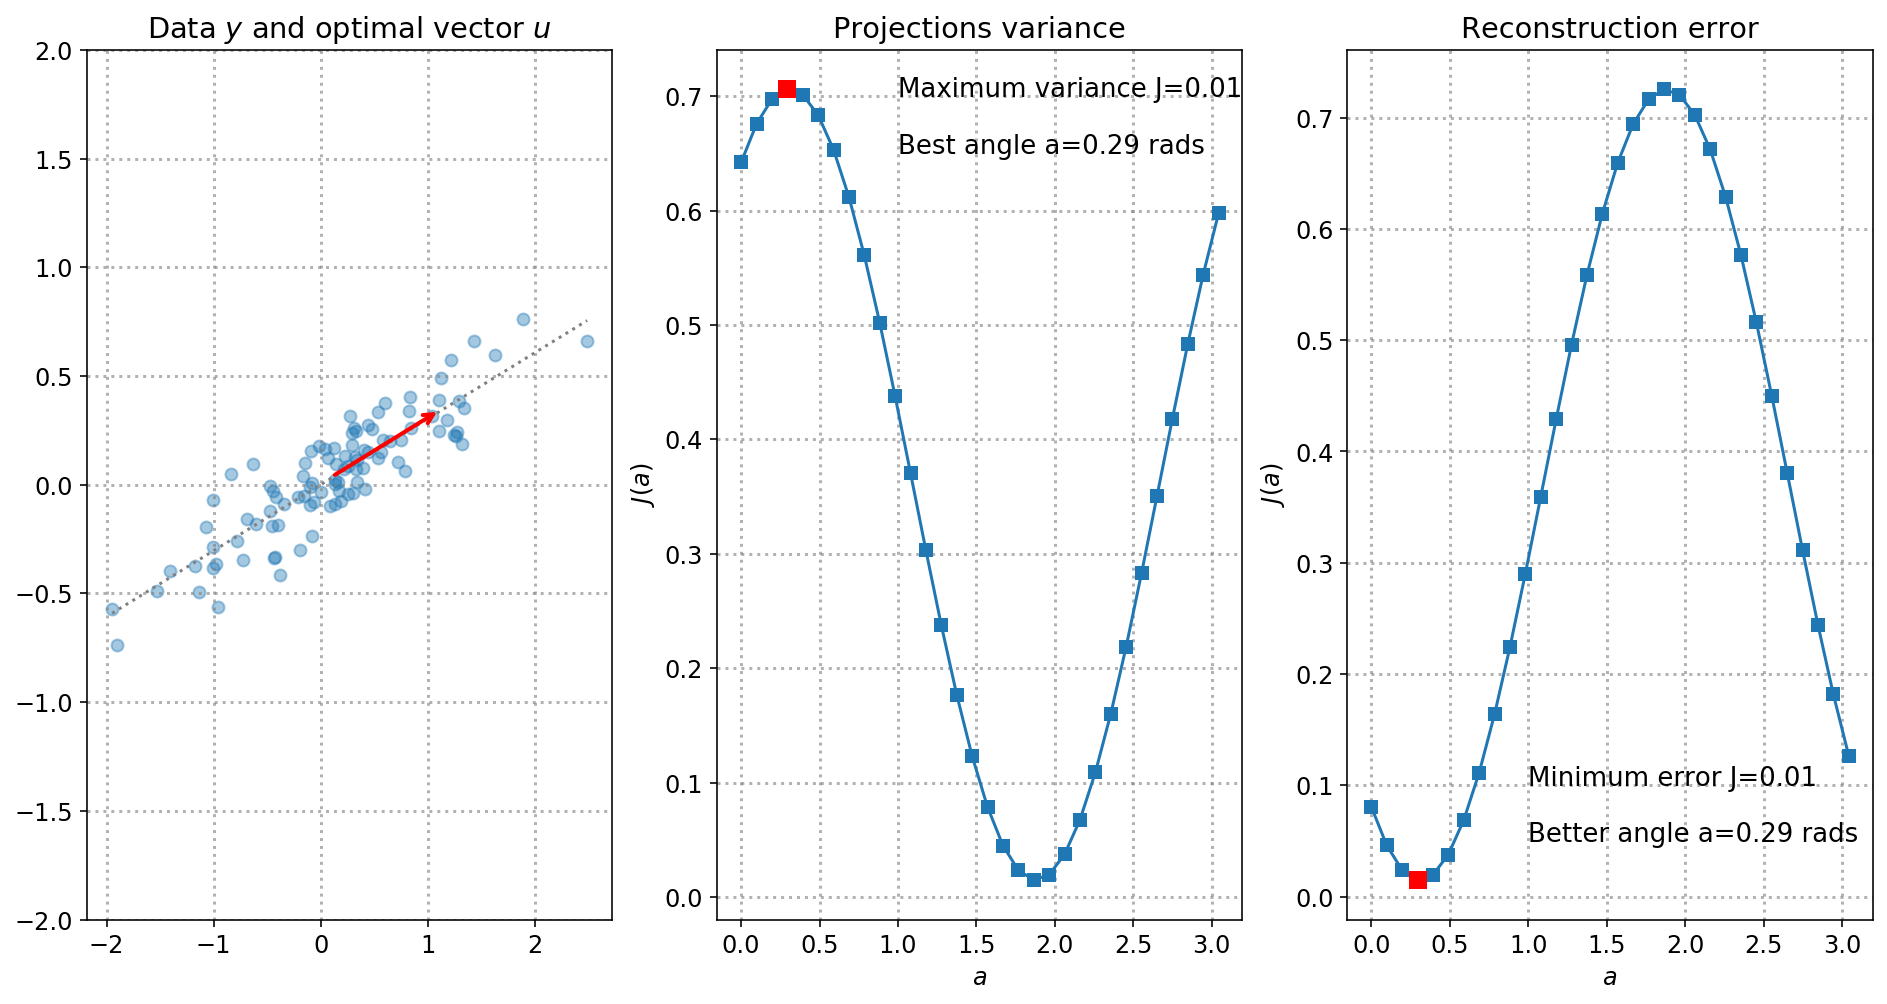

In [5]:
# Define the angles for all the possible vectors u
a_vector = np.arange(0,1,1./32)*np.pi

variance = []

J = []

for i,a in enumerate(a_vector):
    u = np.array([np.cos(a),np.sin(a)]).reshape([-1,1]) # Cartesian coords
    
    Z = X @ u # Projections over u of the data
    
    X_r = Z @ u.T 
    
    J.append(np.mean(np.linalg.norm(X-X_r,axis=1)**2))

    variance.append(np.var(Z))
    
a_opt = a_vector[np.argmin(J)]
u_opt = np.array([np.cos(a_opt),np.sin(a_opt)]).reshape([-1,1])
    
fig, (ax_l, ax_c, ax_r) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

ax_l.set_ylim([-1,1])
ax_l.scatter(X[:, 0], X[:, 1], alpha=0.4)
ax_l.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
xgrid=np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
ax_l.plot(xgrid, xgrid*u_opt[1]/u_opt[0], ':', color='gray')
draw_vector(np.mean(X,axis=0).reshape(2,1), np.mean(X,axis=0).reshape(2,1) + u_opt,ax_l)
ax_l.set_ylim(-2,2)
ax_l.set_title(r"Data $y$ and optimal vector $u$")

ax_c.plot(a_vector,variance,'-s')
ax_c.plot(a_opt,np.max(variance),'rs',ms=8)
ax_c.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_c.set_xlabel("$a$")
ax_c.set_ylabel("$J(a)$")
ax_c.set_title("Projections variance")
ax_c.text(1., 0.7, 'Maximum variance J={0:.2f}'.format(np.min(J)), fontsize=13)
ax_c.text(1., 0.65, 'Best angle a={0:.2f} rads'.format(a_opt), fontsize=13)

ax_r.plot(a_vector,J,'-s')
ax_r.plot(a_opt,np.min(J),'rs',ms=8)
ax_r.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax_r.set_xlabel("$a$")
ax_r.set_ylabel("$J(a)$")
ax_r.set_title("Reconstruction error")
ax_r.text(1., 0.1, 'Minimum error J={0:.2f}'.format(np.min(J)), fontsize=13)
ax_r.text(1., 0.05, 'Better angle a={0:.2f} rads'.format(a_opt), fontsize=13)
    
plt.show()

We corroborate that the **minimum reconstruction error is obtained for the vector that induces the high variance in the projected space**. In PCA the goal is to obtain the matrix $\bf U$ that leads to a maxmization of the projected variance, which, as we have seen, minimizes the reconstruction error. 


## The PCA algorithm

The PCA solution is the set of principal components that maximize the variance in the projections of the data. Concretely, the solution is computed with the following steps:

- The first principal component is the one that maximizes the variance of the data projected on $\mathbf{u}_1$:

- The second principal component is **orthonormal** to component $\mathbf{u}_1$ that maximizes the variance of the data projected on $\mathbf{u}_2$:

- This procedure is repeated recurrently until finding the $K$ principal components.


## Choosing the number of components

A typical approach for choosing the number of components is by obtaining the **explained variance** ratio, given by the explained variance of the first $k$ components over the sum of all the eigenvalues of the covariance matrix. This is tipically used for validating how many $PCs$ are needed for covering a target percentage of the explained variance (usually more than 85%)


## PCA Solution


The principal components correspond to the **eigenvectors** of the covariance matrix. The explained variance within each dimension coincides with the corresponding **eigenvalue**: the hifher the eigenvalue, the higher importance the dimension is wrt to the data.


In [7]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)   

print(pca.components_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]


**We can obtain the variance for each principal component using $\lambda_j=$<code>explained_variance_[n]</code>.**

In [8]:
# Variance computed from data projections:
projections = pca.transform(X)  # Projected data onto u1 and u2
for n in range(n_components):
    print("Variance on projections over the component {0:d} : {1:.2f}".format(n,np.var(projections[:,n])))

# Variance obtained from sklearn object:
print('using sklearn:')
for n in range(n_components):
    var = pca.explained_variance_[n]
    print("Variance on projections over the component {0:d} : {1:.2f}".format(n,var))
    
  

Variance on projections over the component 0 : 0.71
Variance on projections over the component 1 : 0.01
using sklearn:
Variance on projections over the component 0 : 0.71
Variance on projections over the component 1 : 0.01


We can plot the resulting principal componentes obtained from sklearn, and plot the transformed space (just for visualization, as in this case $D=K$). Normally, PCA is used for dimensionality reduction when $K<<D$.

c:\users\eva\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


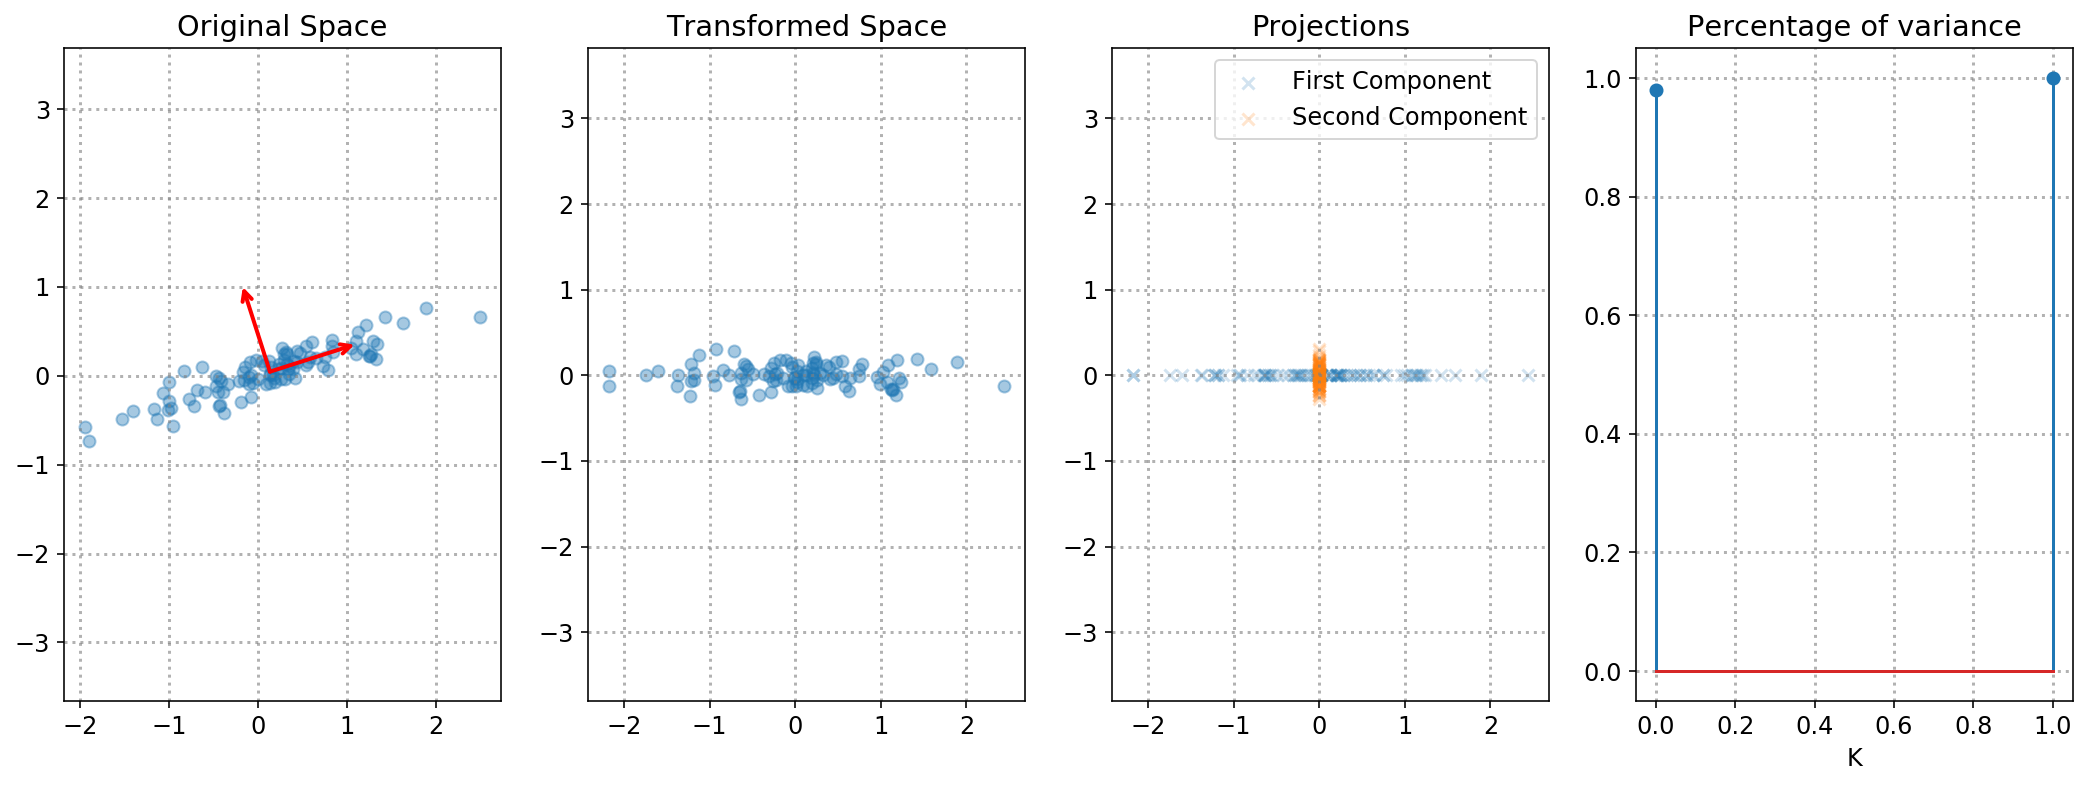

In [9]:
# plot data
f, axs = plt.subplots(1,4, figsize=(18, 6))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.4)
axs[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector 
    draw_vector(pca.mean_, pca.mean_ + v, axs[0])
axs[0].axis('equal')
axs[0].set_title('Original Space')

Z = pca.transform(X)
axs[1].scatter(Z[:, 0], Z[:, 1], alpha=0.4)
axs[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
axs[1].axis('equal')
axs[1].set_title('Transformed Space')

axs[2].scatter(Z[:, 0], np.zeros_like(Z[:, 0]), marker='x', alpha=0.2, label='First Component')
axs[2].scatter(np.zeros_like(Z[:, 1]), Z[:, 1], marker='x', alpha=0.2, label='Second Component')
axs[2].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
axs[2].axis('equal')
axs[2].legend(loc='best')
axs[2].set_title('Projections')

variances = [np.var(Z[:, i]) for i in range(Z.shape[-1])]
explained_variances = np.cumsum(variances) / np.sum(variances)
axs[3].stem(explained_variances)
axs[3].set_xlabel('K')
axs[3].set_title('Percentage of variance')
axs[3].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.show()


# Experiments

## Visualizing a wine dataset

We will use the [wine dataset](https://www.kaggle.com/sgus1318/winedata) and use $PCA$ to reduce the number of components.



In [13]:
# Load wine data
data = pd.read_csv('wines.csv', index_col=0)
print(data.shape)
data.head()


(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [14]:
X = data.values[:, :-1].astype(float)
Y = data.values[:, -1]

# Normalize data
transformer = StandardScaler().fit(X)  
Xn = transformer.transform(X)

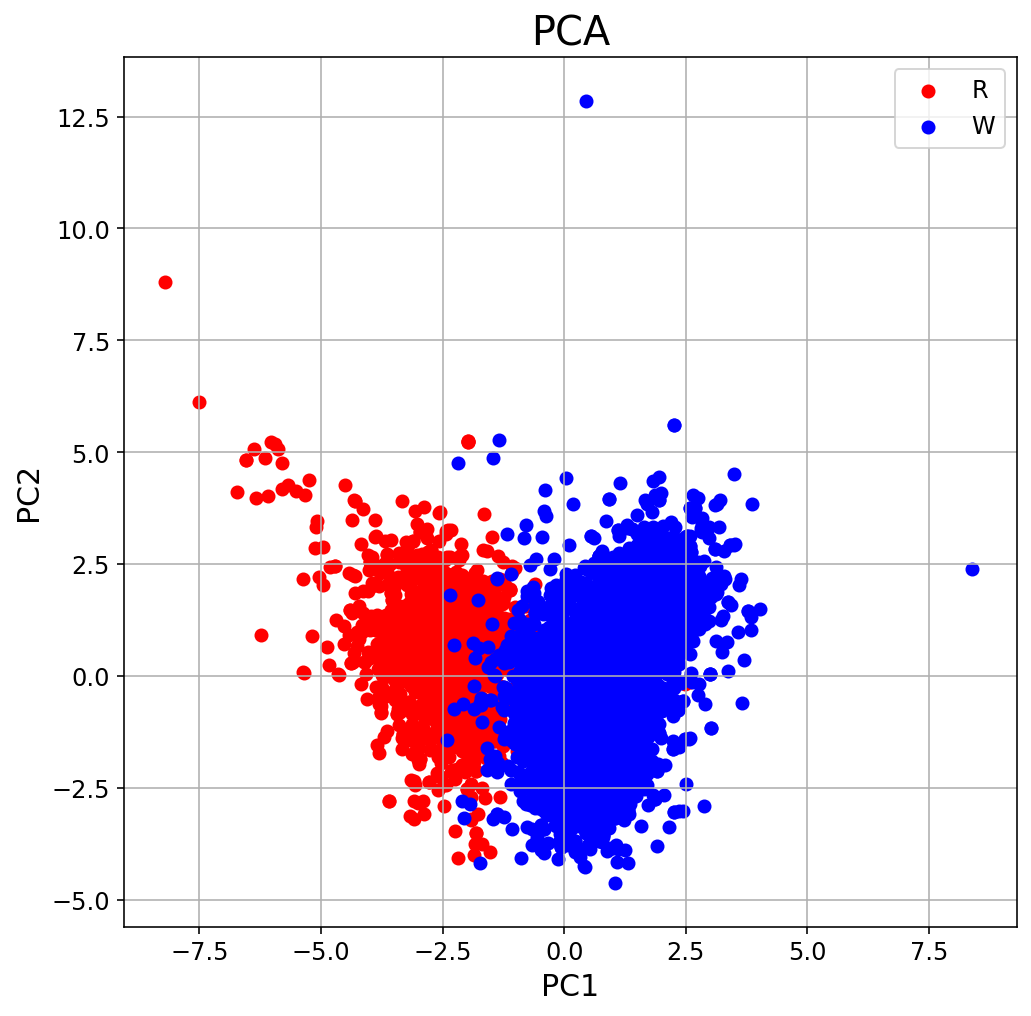

In [15]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
pca.fit(Xn)   

projections = pca.transform(Xn)

princ_comp = pd.DataFrame(data = projections, columns = ['PC1', 'PC2'])
new_y = pd.DataFrame(data = Y, columns = ['color'])
new_data = pd.concat([princ_comp, new_y], axis = 1)


plot = plt.figure(figsize = (8,8))
ax = plot.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)


for lab, col in zip(('R', 'W'),
                    ('r', 'b')):
    ax.scatter(new_data.loc[new_data['color']==lab, 'PC1'],
                new_data.loc[new_data['color']==lab, 'PC2'],
                label=lab,
                c=col)
ax.legend(['R', 'W'])
ax.grid()
    

[0.2534622610624766, 0.22082116636985488, 0.13679223475132243, 0.0890521046053602, 0.07004170545639588, 0.05503326473787565, 0.046985537405553064, 0.04299856988136718, 0.03819769027769935, 0.02491774179854412, 0.018965626644896264, 0.0027320970086548778]


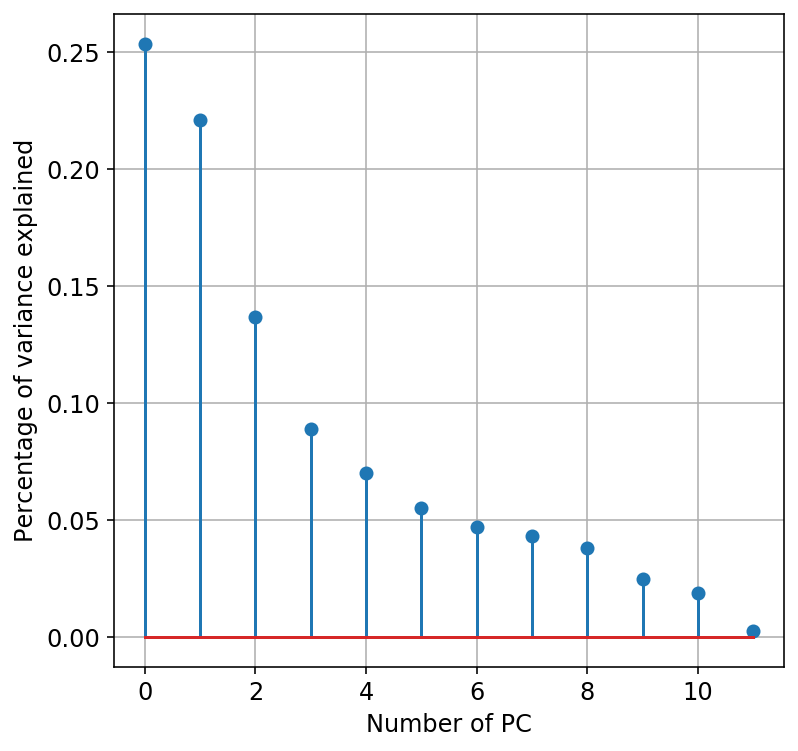

In [16]:

def explained_variance_ratio(X):

    (rows, cols) = np.shape(X)
    F_k = []
    for i in range(1, cols+1):
        n_components = i
        pca = PCA(n_components=n_components)
        pca.fit(X)   
        projections = pca.transform(X)  # Projected data onto u1 and u2
        var = pca.explained_variance_ratio_[i-1]
        F_k.append(var)
    
    return F_k

F_k = explained_variance_ratio(Xn)
print(F_k)


plt.stem(F_k, use_line_collection = True)
plt.xlabel('Number of PC')
plt.ylabel('Percentage of variance explained')
plt.grid()
plt.show()



## Thoughts and Comments:


**Would it be possible to guess the type of a wine by visualizing its PCA projection?**.
- Yes, looking at the plot we can see that First Principal Component can separate the two types of wine. If the value of the First Principal Component is lower than -2, then the wine will be probably white. However if the value is bigger than -2, the wine probably will be red.

**Are all the features of the wines dataset are indispensable?**
- No, they are not indispensable. Considering only the first 5 principal components, they can explain more than the 85% of the variance.


## PCA Feature Extraction

Another common use of PCA is the dimensionality reduction of data before the input to a regressor or classifier, which might reduce the overfitting due to the high dimension, and reduce the computational charge. 

We will be using the [Spam Database](https://archive.ics.uci.edu/ml/datasets/Spambase), a dataset with spam indicators oriented to classify spam mail. Each feature is an indicator of the frequency that a word appear in the mail. Using PCA, we will reduce the dimension of the data and improve the classifer in the test set.



In [17]:
def load_spam():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
    data.columns=["wf_make",         
        "wf_address",      
        "wf_all",          
        "wf_3d",           
        "wf_our",          
        "wf_over",         
        "wf_remove",       
        "wf_internet",     
        "wf_order",        
        "wf_mail",         
        "wf_receive",      
        "wf_will",         
        "wf_people",       
        "wf_report",       
        "wf_addresses",    
        "wf_free",         
        "wf_business",     
        "wf_email",        
        "wf_you",          
        "wf_credit",       
        "wf_your",         
        "wf_font",         
        "wf_000",          
        "wf_money",        
        "wf_hp",           
        "wf_hpl",          
        "wf_george",       
        "wf_650",          
        "wf_lab",          
        "wf_labs",         
        "wf_telnet",       
        "wf_857",          
        "wf_data",         
        "wf_415",          
        "wf_85",           
        "wf_technology",   
        "wf_1999",         
        "wf_parts",        
        "wf_pm",           
        "wf_direct",       
        "wf_cs",           
        "wf_meeting",      
        "wf_original",     
        "wf_project",      
        "wf_re",           
        "wf_edu",          
        "wf_table",        
        "wf_conference",   
        "cf_;",            
        "cf_(",            
        "cf_[",            
        "cf_!",            
        "cf_$",            
        "cf_#",            
        "cap_average", 
        "cap_longest", 
        "cap_total",
        "target"]
    return data

data = load_spam()

X = data[data.columns[:57]].values
Y = data['target'].values


# Divide into train/test set
X_tr, X_test, Y_tr, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalize data
transformer_spam = StandardScaler().fit(X_tr)  
Xn_tr = transformer_spam.transform(X_tr)
Xn_test = transformer_spam.transform(X_test)

print("Loaded {0:d} obsevations with {1:d} columns\n".format(len(data), len(data.columns)))

# We reduce to 100 the number of observations, to make the problem computationally affordable
Xn_tr = Xn_tr[:100,:]
Y_tr = Y_tr[:100]

data.head()

Loaded 4601 obsevations with 58 columns



,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,cap_average,cap_longest,cap_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


We are going to validate and train a KNN clasiffier on the first 100 samples

In [18]:
from sklearn import neighbors

# Training a k-NN con validación de vecinos

K_max = 15
rang_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
dict_params = [{'n_neighbors': rang_K,'weights':['uniform','distance']}]

# Cross Validation
knn_spam = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=dict_params,cv=nfold, iid = False)

# Training
knn_spam.fit(Xn_tr,Y_tr)

# Test
accuracy_train_knn = knn_spam.score(Xn_tr,Y_tr)
accuracy_test_knn = knn_spam.score(Xn_test,Y_test)

print("Number of selected neighbors k={0:d}".format(knn_spam.best_params_['n_neighbors']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))



Number of selected neighbors k=5
Accuracy train 87.00%. Accuracy test 81.10%



**Obtaining the best $K$ that maximizes the test accuracy after applying PCA.**

In [27]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('PCA', PCA()),
                 ('kNN', neighbors.KNeighborsClassifier())])

PCs = np.arange(1, X.shape[1])
weights = ['uniform', 'distance']

dict_params = {
    'PCA__n_components':PCs ,
    'kNN__weights':weights,
    'kNN__n_neighbors': rang_K}


# Cross-Validation
grid = GridSearchCV(pipe, param_grid = dict_params, cv=nfold, iid = False)

# Training
grid.fit(Xn_tr,Y_tr)

# Test
accuracy_train_knn = grid.score(Xn_tr,Y_tr)
accuracy_test_knn = grid.score(Xn_test,Y_test)
best_k = grid.best_params_['kNN__n_neighbors']
print("Number of selected neighbors k={0:d}".format(best_k))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

# a k of 24 is the best value.


Number of selected neighbors k=1
Accuracy train 100.00%. Accuracy test 83.35%



**Now we will obtain the number of components that explain a $90\%$ of the variance of the train set. 

Number of components tat explain 90% of the variance: 24 components
 
Percentage of explained variance covered by the first 1 components is: 21.711


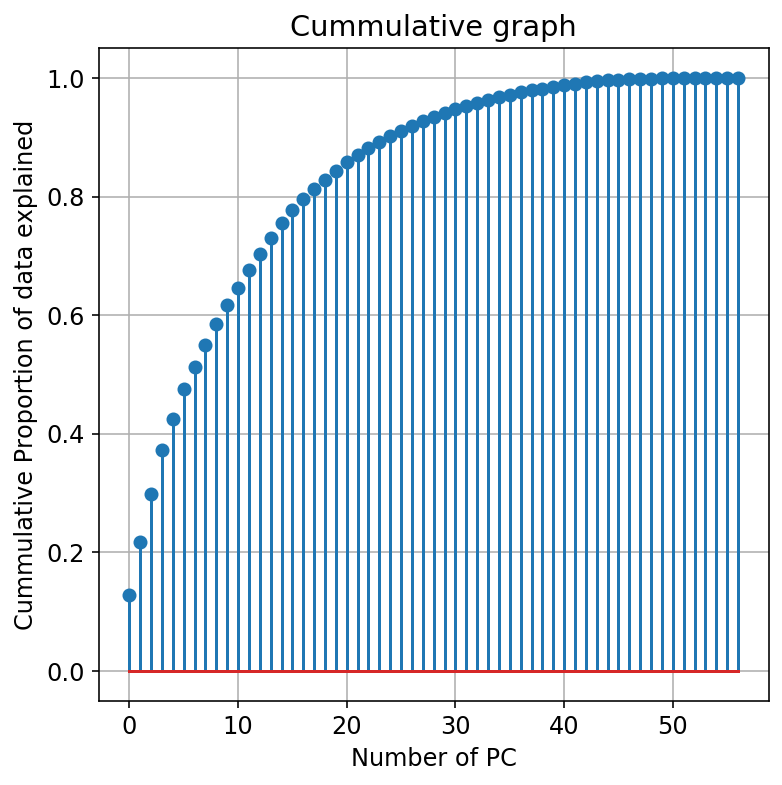

In [24]:

n_components=X.shape[1]
F_k = explained_variance_ratio(Xn_tr)
F_k = np.array(F_k)
F_k_cummulative = np.cumsum(F_k)
# we want to work with the cummulative values, not the percentages.
K_over_ninety = F_k_cummulative[F_k_cummulative>=0.9]

K_index = (np.where(F_k_cummulative == K_over_ninety[0]))
K_index = K_index[0][0]

print("Number of components tat explain 90% of the variance: {0:.0f} components\n ".format(K_index))

print("Percentage of explained variance covered by the first {} components is: {}".format(best_k, 
                                                                                          round(F_k_cummulative[best_k]*100, 3)))


plt.stem(F_k_cummulative, use_line_collection = True)
plt.xlabel('Number of PC')
plt.ylabel('Cummulative Proportion of data explained')
plt.grid()
plt.title('Cummulative graph')
plt.show()